In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import json
import gzip
import ast

# popularity based

In [3]:
places = pd.read_csv("/content/drive/Shareddrives/RS/LA02/Places/Final_places.csv", lineterminator='\n' )

In [4]:
places.head()

,Unnamed: 0,Unnamed: 0.1,name,address,hours,phone,closed,gPlusPlaceId,gps
0,0,0,Diamond Valley Lake Marina,"['2615 Angler Ave', 'Hemet, CA 92545']","[['Monday', [['6:30 am--4:15 pm']]], ['Tuesday...",(951) 926-7201,False,104699454385822125632,"[33.703804, -117.003209]"
1,1,2,Portofino,"['ул. Тутаева, 1', 'Nazran, Ingushetia, Russia...","[['Monday', [['9:30 am--9:00 pm']]], ['Tuesday...",8 (963) 173-38-38,False,109810290098030327104,"[43.22776, 44.762726]"
2,2,3,T C's Referee Sports Bar,"['5322 W 26th St', 'Sioux Falls, SD 57106']","[['Monday', [['11:00 am--10:00 pm']]], ['Tuesd...",(605) 361-2208,False,100327153115986850675,"[43.529494, -96.792244]"
3,3,4,Carrefour - Palembang Square,"['Jl. Angkatan 45', 'Kompleks Palembang Square...","[['Monday', [['8:00 am--9:00 pm']]], ['Tuesday...",(0711) 359918,False,103368487323937936043,"[-2.976256, 104.742662]"
4,4,9,Old Chicago,"['17960 NW Evergreen Pkwy', 'Beaverton, OR 970...","[['Monday', [['11:00 am--1:00 am']]], ['Tuesda...",(503) 533-4650,False,118222137795476771294,"[45.535176, -122.862242]"


In [5]:
reviews = pd.read_csv("/content/drive/Shareddrives/RS/LA02/Reviews/Reviews_preprocessed_positive.csv", lineterminator='\n')

In [6]:
reviews.head()

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment
0,1,4.0,william spindler,Best War Wanton soup in Red Bluff,"['Asian Restaurant', 'Chinese Restaurant']",106591714648856494903,100000032416892623125,positive
1,2,5.0,william spindler,This is a review that is long overdo. I've bee...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,100000032416892623125,positive
2,3,5.0,william spindler,"Some authentic rub BBQ, great food and don't m...",['Barbecue Restaurant'],111623070919810985923,100000032416892623125,positive
3,4,4.0,william spindler,Truly a Red Bluff standard. Great old fashione...,['Restaurant'],113854191152597312098,100000032416892623125,positive
4,5,5.0,william spindler,"Long time favorite Mexican food, always consis...",['Mexican Restaurant'],115827996910815192564,100000032416892623125,positive


In [7]:
reviews = pd.merge(reviews,places,on='gPlusPlaceId',how='inner')

In [8]:
reviews

,Unnamed: 0_x,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment,Unnamed: 0_y,Unnamed: 0.1,name,address,hours,phone,closed,gps
0,1,4.0,william spindler,Best War Wanton soup in Red Bluff,"['Asian Restaurant', 'Chinese Restaurant']",106591714648856494903,100000032416892623125,positive,538788,2794805,Peking Chinese Restaurant,"['860 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--8:30 pm']]], ['Tuesda...",(530) 527-0523,False,"[40.179159, -122.236162]"
1,2,5.0,william spindler,This is a review that is long overdo. I've bee...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,100000032416892623125,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
2,3876786,3.0,Gary Roper,Everytime I call the people are not very frien...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,111167453231753492347,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
3,3990883,5.0,Darrick Ericksen,Best pizza in town by far.,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,111493081926477999111,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
4,4052874,4.0,Daniel Hernandez,mayne hungry as a mofo after get low wit dem r...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,111670739540794351906,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031424,6378465,3.0,jeannette basquin,I like this Starbucks very much. It is my seco...,['Coffee Shop'],100744070618122324571,118446692227028504446,positive,208310,497395,Starbucks,"['3030 Western Center Blvd', 'Fort Worth, TX 7...","[['Monday', [['5:00 am--11:00 pm']]], ['Tuesda...",(817) 232-9527,False,"[32.860615, -97.316012]"
3031425,6378468,4.0,jeannette basquin,This Starbucks is THEE BEST! Especially when i...,['Coffee Shop'],104012221781323448380,118446692227028504446,positive,317405,759575,Starbucks,"['1608 W Rosedale St', 'Fort Worth, TX 76104']","[['Monday', [['4:00 am--9:00 pm']]], ['Tuesday...",(817) 348-8427,False,"[32.733497, -97.344147]"
3031426,6378488,1.0,Alex Ross,Drove around all day looking for a place that ...,['Coin Dealer'],111316380931798396275,118446710574296999580,positive,92053,219551,The Gold Guy - Cash For Gold,"['12202 N Cave Creek Rd #3', 'Phoenix, AZ 85022']","[['Monday', [['11:00 am--6:00 pm']]], ['Tuesda...",(602) 482-2143,False,"[33.597227, -112.038]"
3031427,6378496,5.0,Justin McMinn,Very professional staff and exceptionally clea...,"['Ambulance Service', 'Handicapped Transportat...",100374647127486521856,118446733868397970257,positive,338085,2310170,Mile High Ambulance,"['8200 E Pacific Pl #210', 'Denver, CO 80231']","[['Monday', [['Open 24 hours']]], ['Tuesday', ...",(303) 564-6636,False,"[39.662227, -104.864013]"


In [9]:
reviews.duplicated().sum()

0

In [10]:
reviews= reviews.drop_duplicates()

In [11]:
reviews

,Unnamed: 0_x,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment,Unnamed: 0_y,Unnamed: 0.1,name,address,hours,phone,closed,gps
0,1,4.0,william spindler,Best War Wanton soup in Red Bluff,"['Asian Restaurant', 'Chinese Restaurant']",106591714648856494903,100000032416892623125,positive,538788,2794805,Peking Chinese Restaurant,"['860 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--8:30 pm']]], ['Tuesda...",(530) 527-0523,False,"[40.179159, -122.236162]"
1,2,5.0,william spindler,This is a review that is long overdo. I've bee...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,100000032416892623125,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
2,3876786,3.0,Gary Roper,Everytime I call the people are not very frien...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,111167453231753492347,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
3,3990883,5.0,Darrick Ericksen,Best pizza in town by far.,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,111493081926477999111,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
4,4052874,4.0,Daniel Hernandez,mayne hungry as a mofo after get low wit dem r...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,111670739540794351906,positive,360532,863979,Firehouse Pizza,"['734 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031424,6378465,3.0,jeannette basquin,I like this Starbucks very much. It is my seco...,['Coffee Shop'],100744070618122324571,118446692227028504446,positive,208310,497395,Starbucks,"['3030 Western Center Blvd', 'Fort Worth, TX 7...","[['Monday', [['5:00 am--11:00 pm']]], ['Tuesda...",(817) 232-9527,False,"[32.860615, -97.316012]"
3031425,6378468,4.0,jeannette basquin,This Starbucks is THEE BEST! Especially when i...,['Coffee Shop'],104012221781323448380,118446692227028504446,positive,317405,759575,Starbucks,"['1608 W Rosedale St', 'Fort Worth, TX 76104']","[['Monday', [['4:00 am--9:00 pm']]], ['Tuesday...",(817) 348-8427,False,"[32.733497, -97.344147]"
3031426,6378488,1.0,Alex Ross,Drove around all day looking for a place that ...,['Coin Dealer'],111316380931798396275,118446710574296999580,positive,92053,219551,The Gold Guy - Cash For Gold,"['12202 N Cave Creek Rd #3', 'Phoenix, AZ 85022']","[['Monday', [['11:00 am--6:00 pm']]], ['Tuesda...",(602) 482-2143,False,"[33.597227, -112.038]"
3031427,6378496,5.0,Justin McMinn,Very professional staff and exceptionally clea...,"['Ambulance Service', 'Handicapped Transportat...",100374647127486521856,118446733868397970257,positive,338085,2310170,Mile High Ambulance,"['8200 E Pacific Pl #210', 'Denver, CO 80231']","[['Monday', [['Open 24 hours']]], ['Tuesday', ...",(303) 564-6636,False,"[39.662227, -104.864013]"


In [12]:
num_rating_df = reviews.groupby('name').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,name,num_ratings
0,D'Andrea's Pizza,4
1,Swati Water Purification,1
2,!! CALL GIRLS CHANDIGARH CALL GIRL SERVICE !!,4
3,!! ESCORT ESCORTS !!,1
4,!!! ESCORTS SERVICE !!! ESCORT SERVICES !!!,19
...,...,...
607580,ＺＡＲＡＭＥ,1
607581,ｂｅｅｒｃａｆｅＨＯＰＭＡＮ,1
607582,ｍａｒｂｌｅ,1
607583,ｒｅｓｔａｕｒａｎｔ & bar tubes,1


In [13]:
avg_rating_df = reviews.groupby('name').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating_df

,name,avg_rating
0,D'Andrea's Pizza,3.750000
1,Swati Water Purification,4.000000
2,!! CALL GIRLS CHANDIGARH CALL GIRL SERVICE !!,4.000000
3,!! ESCORT ESCORTS !!,4.000000
4,!!! ESCORTS SERVICE !!! ESCORT SERVICES !!!,4.894737
...,...,...
607580,ＺＡＲＡＭＥ,5.000000
607581,ｂｅｅｒｃａｆｅＨＯＰＭＡＮ,4.000000
607582,ｍａｒｂｌｅ,4.000000
607583,ｒｅｓｔａｕｒａｎｔ & bar tubes,3.000000


In [14]:
popular_df = num_rating_df.merge(avg_rating_df,on='name').reset_index()
popular_df

,index,name,num_ratings,avg_rating
0,0,D'Andrea's Pizza,4,3.750000
1,1,Swati Water Purification,1,4.000000
2,2,!! CALL GIRLS CHANDIGARH CALL GIRL SERVICE !!,4,4.000000
3,3,!! ESCORT ESCORTS !!,1,4.000000
4,4,!!! ESCORTS SERVICE !!! ESCORT SERVICES !!!,19,4.894737
...,...,...,...,...
607580,607580,ＺＡＲＡＭＥ,1,5.000000
607581,607581,ｂｅｅｒｃａｆｅＨＯＰＭＡＮ,1,4.000000
607582,607582,ｍａｒｂｌｅ,1,4.000000
607583,607583,ｒｅｓｔａｕｒａｎｔ & bar tubes,1,3.000000


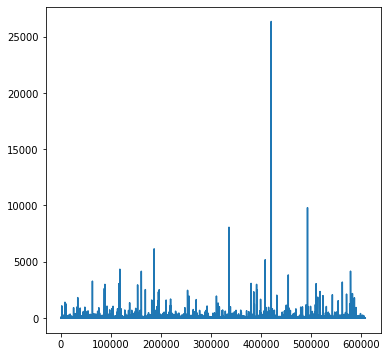

In [15]:
import matplotlib.pyplot as plt 
popular_df["num_ratings"].plot(x="u", y="num_ratings", figsize=(6, 6))
plt.show()

In [16]:
popular_df.describe()

,index,num_ratings,avg_rating
count,607585.00000,607585.000000,607585.000000
mean,303792.00000,4.989308,4.394250
std,175394.82599,46.645474,0.836622
min,0.00000,1.000000,1.000000
25%,151896.00000,1.000000,4.000000
50%,303792.00000,2.000000,4.750000
75%,455688.00000,4.000000,5.000000
max,607584.00000,26357.000000,5.000000


In [17]:
popular_df = popular_df.sort_values('avg_rating',ascending=False)

In [18]:
popular_df

,index,name,num_ratings,avg_rating
303792,303792,Le Village des Tortues,1,5.0
514282,514282,Tchibo,1,5.0
263637,263637,JOYTRIP.PL - Biuro podróży,1,5.0
263635,263635,"JOYCE STAMP LILLY, R.N., J.D.; Attorney at Law",1,5.0
514283,514283,Tchibo Filiale,4,5.0
...,...,...,...,...
123563,123563,Clayburn computers,1,1.0
34332,34332,Aquia Family Medical Center,1,1.0
123580,123580,Clays Mill Veterinary Clinic,1,1.0
477995,477995,Slice - a pizza company,1,1.0


In [19]:
rcmd_popular_df = popular_df[popular_df['num_ratings']>=1200].sort_values('avg_rating',ascending=False).reset_index()

In [ ]:
rcmd_popular_df.head(10)

,level_0,index,name,num_ratings,avg_rating
0,227041,227041,Public Storage,13794,4.904596
1,100586,100586,Extra Space Storage,2819,4.893225
2,105155,105155,First Choice Emergency Room,1429,4.827152
3,62382,62382,Chick-fil-A,1536,4.583984
4,106031,106031,Five Guys Burgers and Fries,1203,4.300083
5,266004,266004,Starbucks,5035,4.240914
6,211174,211174,Panera Bread,1548,4.197028
7,63570,63570,Chipotle Mexican Grill,2269,4.162186
8,205222,205222,Olive Garden,1505,4.096346
9,208100,208100,Outback Steakhouse,1221,3.972973


In [ ]:
popular_df['gPlusPlaceId'][0]

'111914865771779811390'

# Collaborative Filtering Based Recommender System

In [ ]:
reviews

,Unnamed: 0_x,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment,Unnamed: 0_y,Unnamed: 0.1,name,address,hours,phone,closed,gps
0,1,4.0,william spindler,Best War Wanton soup in Red Bluff,"['Asian Restaurant', 'Chinese Restaurant']",106591714648856494903,100000032416892623125,positive,538789,2794805,Peking Chinese Restaurant,"['860 Main St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--8:30 pm']]], ['Tuesda...",(530) 527-0523,False,"[40.179159, -122.236162]"
2,5,5.0,william spindler,"Long time favorite Mexican food, always consis...",['Mexican Restaurant'],115827996910815192564,100000032416892623125,positive,420503,2509161,La Corona,"['914 Walnut St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 528-9496,False,"[40.175064, -122.242574]"
4,53822,5.0,James Costa,Best Mexican Food in Red Bluff.......Family ow...,['Mexican Restaurant'],115827996910815192564,100156345149023336684,positive,420503,2509161,La Corona,"['914 Walnut St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 528-9496,False,"[40.175064, -122.242574]"
6,56585,5.0,Doug Falke,This place is awesome. The food is top notch ...,['Mexican Restaurant'],115827996910815192564,100164982335939791768,positive,420503,2509161,La Corona,"['914 Walnut St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 528-9496,False,"[40.175064, -122.242574]"
8,318059,4.0,john peterson,Finnally a good meal! Best since arrival in Re...,['Mexican Restaurant'],115827996910815192564,100915754139202877823,positive,420503,2509161,La Corona,"['914 Walnut St', 'Red Bluff, CA 96080']","[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 528-9496,False,"[40.175064, -122.242574]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139120,6378371,5.0,Alichia Hunsaker,Went in to get a bra and the assistant manager...,"['Shoe Store', ""Women's Clothing Store""]",114308286171446852798,118446427776790833447,positive,206511,1994073,Lane Bryant,"['6815 Camino Arroyo', 'Gilroy, CA 95020']","[['Monday', [['10:00 am--8:00 pm']]], ['Tuesda...",(408) 337-3601,False,"[37.001623, -121.553901]"
3139122,6378419,4.0,Anders Bumkon,"If you want to treat yourself, the food is exc...","['Italian Restaurant', 'European Restaurant']",109628674818576668598,118446571615580632994,positive,280778,2172101,E Baldi,"['375 N Canon Dr', 'Beverly Hills, CA 90210']","[['Monday', [['Closed']]], ['Tuesday', [['11:3...",(310) 248-2633,False,"[34.070407, -118.400825]"
3139124,6378425,4.0,Mark Salmon,The parish church of Harlescott. A friendly fa...,['Church'],109689599013604731241,118446595182163314181,positive,606224,2957552,Church of the Holy Spirit,"['Shrewsbury', 'Shropshire', 'United Kingdom']","[['Monday', [['Closed']]], ['Tuesday', [['8:00...",01743 362883,False,"[52.731237, -2.721992]"
3139126,6378496,5.0,Justin McMinn,Very professional staff and exceptionally clea...,"['Ambulance Service', 'Handicapped Transportat...",100374647127486521856,118446733868397970257,positive,338086,2310170,Mile High Ambulance,"['8200 E Pacific Pl #210', 'Denver, CO 80231']","[['Monday', [['Open 24 hours']]], ['Tuesday', ...",(303) 564-6636,False,"[39.662227, -104.864013]"


In [ ]:
x = reviews.groupby('gPlusUserId').count()['rating'] > 200
loyal_users = x[x].index

In [ ]:
x.shape

(1034764,)

In [ ]:
filtered_rating = reviews[reviews['gPlusUserId'].isin(loyal_users)]

In [ ]:
filtered_rating

,Unnamed: 0_x,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment,Unnamed: 0_y,Unnamed: 0.1,name,address,hours,phone,closed,gps
378,4876793,4.0,Athena Chang,Another Trader Joe's in New York City is a goo...,['Grocery Store'],105947477166033397439,114047136817929006626,positive,266600,2138088,Trader Joe's,"['2073 Broadway', 'New York, NY 10023']","[['Monday', [['8:00 am--10:00 pm']], 1], ['Tue...",(212) 799-0028,False,"[40.778503, -73.982249]"
388,5234592,5.0,ej shortell,Love Trader Joes. Great cheap wines and other ...,['Grocery Store'],105947477166033397439,115082761597075271038,positive,266600,2138088,Trader Joe's,"['2073 Broadway', 'New York, NY 10023']","[['Monday', [['8:00 am--10:00 pm']], 1], ['Tue...",(212) 799-0028,False,"[40.778503, -73.982249]"
428,1026203,4.0,James Beswick,It great to know that after 10 years since the...,"['French Restaurant', 'American Restaurant', '...",115453471525181677863,102951244563603960635,positive,656698,3080340,Cafe Luxembourg,"['200 W 70th St', 'New York, NY 10023']","[['Monday', [['8:00 am--11:00 pm']], 1], ['Tue...",(212) 873-7411,False,"[40.777402, -73.983032]"
886,3594376,5.0,Tyler Harding,"This is GAP's flagship store in the city, so y...","['Clothing Store', ""Women's Clothing Store"", ""...",100556368174926958612,110357160824479158301,positive,669468,3111028,Gap,"['Flood Ave', 'San Francisco, CA 94102']","[['Monday', [['10:00 am--9:00 pm']], 1], ['Tue...",(415) 788-5909,False,"[37.784711, -122.407447]"
2028,2740144,5.0,Anthony Thiros,"The very first Chipotle, this place is small b...","['Fast Food Restaurant', 'Latin American Resta...",114740961162832201829,107887899089952554713,positive,540560,2799048,Chipotle Mexican Grill,"['1644 E Evans Ave', 'Denver, CO 80210']","[['Monday', [['10:30 am--10:00 pm']]], ['Tuesd...",(303) 722-4121,False,"[39.678329, -104.967812]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120790,6049100,4.0,Ambelique Malebranche,They were nice enough to help me with my phone...,['Cell Phone Store'],112898488699618960464,117478208650138023908,positive,71161,1670656,Verizon Wireless,"['8524 5th Ave', 'Brooklyn, NY 11209']","[['Monday', [['10:00 am--8:00 pm']], 1], ['Tue...",(718) 491-6680,False,"[40.621678, -74.026355]"
3120792,6049125,4.0,Ambelique Malebranche,This is one of the bigger Stop and Stor locati...,['Self-Storage Facility'],113802420296728067754,117478208650138023908,positive,27008,1565593,Stop & Stor,"['4710 Glenwood Rd', 'Brooklyn, NY 11234']","[['Monday', [['8:00 am--7:00 pm']], 1], ['Tues...",(718) 898-8000,False,"[40.635023, -73.930981]"
3120794,6049168,5.0,Ambelique Malebranche,One of the best delicatessens still around! i...,"['Deli', 'Fast Food Restaurant', 'Sandwich Shop']",115319700942879013497,117478208650138023908,positive,46615,1612446,Mejlander & Mulgannon,"['7615 5th Ave', 'Brooklyn, NY 11209']","[['Monday', [['8:00 am--6:30 pm']], 1], ['Tues...",(718) 238-6666,False,"[40.628259, -74.023016]"
3120796,6049194,4.0,Ambelique Malebranche,You cannot beat this place for good fast Japan...,"['Japanese Restaurant', 'Sushi Restaurant', 'F...",116409963561447795281,117478208650138023908,positive,457148,2597454,Teriyaki Japan Express Grill,"['6814 4th Ave', 'Brooklyn, NY 11220']","[['Monday', [['11:00 am--11:00 pm']], 1], ['Tu...",(718) 833-3068,False,"[40.63502, -74.023513]"


In [ ]:
y = filtered_rating.groupby('name').count()['rating']>=50
famous_places = y[y].index

In [ ]:
y.shape

(4515,)

In [ ]:
final_ratings = filtered_rating[filtered_rating['name'].isin(famous_places)]

In [ ]:
final_ratings

,Unnamed: 0_x,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment,Unnamed: 0_y,Unnamed: 0.1,name,address,hours,phone,closed,gps


In [ ]:
pt = final_ratings.pivot_table(index='name',columns='gPlusUserId',values='rating')

In [ ]:
pt.fillna(0,inplace=True)

# Predict Average rating of the places -  (Trivial)

In [ ]:
reviews = pd.read_csv("/content/drive/Shareddrives/RS/LA02/Reviews/Reviews_preprocessed_positive.csv", lineterminator='\n' )

In [ ]:
reviews.head()

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,gPlusUserId,sentiment
0,1,4.0,william spindler,Best War Wanton soup in Red Bluff,"['Asian Restaurant', 'Chinese Restaurant']",106591714648856494903,100000032416892623125,positive
1,2,5.0,william spindler,This is a review that is long overdo. I've bee...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,100000032416892623125,positive
2,3,5.0,william spindler,"Some authentic rub BBQ, great food and don't m...",['Barbecue Restaurant'],111623070919810985923,100000032416892623125,positive
3,4,4.0,william spindler,Truly a Red Bluff standard. Great old fashione...,['Restaurant'],113854191152597312098,100000032416892623125,positive
4,5,5.0,william spindler,"Long time favorite Mexican food, always consis...",['Mexican Restaurant'],115827996910815192564,100000032416892623125,positive


In [ ]:
reviews.shape

(4337645, 8)

In [ ]:
import gzip
import pandas as pd
# import goslate
import json
import requests

import nltk
import string
from nltk.stem.porter import *
from nltk.corpus import stopwords

nltk.download("stopwords")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
final_place_df = pd.read_csv("/content/drive/Shareddrives/RS/LA02/Places/Final_places.csv", lineterminator='\n' )

In [ ]:
final_place_df.head()

,Unnamed: 0,Unnamed: 0.1,name,address,hours,phone,closed,gPlusPlaceId,gps
0,0,1500000,Pep Boys Auto Parts & Service,"['7625 N Academy Blvd', 'Colorado Spgs, CO 809...","[['Monday', [['8:00 am--8:00 pm']]], ['Tuesday...",(719) 599-4455,False,106604455956312584856,"[38.94162, -104.797586]"
1,1,1500001,Acclaim Hearing Center,"['110', '7321 W Charleston Blvd', 'Las Vegas, ...","[['Monday', [['9:00 am--5:00 pm']]], ['Tuesday...",(702) 363-2336,False,108865044857061260547,"[36.159274, -115.278781]"
2,2,1500005,Zooland Park,"['Route de Cazaux', '33260 La Teste-de-Buch', ...","[['Monday', [['10:00 am--7:00 pm']]], ['Tuesda...",05 56 54 71 44,False,102023846774373264702,"[44.585871, -1.136379]"
3,3,1500006,BlueChip Software GmbH,"['Hochtennstraße 30', '5700 Zell am See', 'Aus...","[['Monday', [['8:00 am--12:00 pm'], ['1:00--5:...",06542 575840,False,110328490284324713981,"[47297029.0, 12798235.0]"
4,4,1500014,Cupolens Gatukök & Kiosk,"['Majgatan 1', '582 46 Linköping', 'Sweden']","[['Monday', [['11:00 am--10:00 pm']]], ['Tuesd...",013-10 35 37,False,116680537008710602604,"[58.407777, 15.590062]"


In [ ]:
final_place_df.shape

(1341688, 9)

##Function - Filtering out data based on GPS coordinates

In [ ]:
import re
# Define the extraction functions
# Define the extraction functions with error handling
def extract_lat(s):
    pattern = r"[-]?\d+\.\d+"
    match = re.findall(pattern, s)
    if match:
        return float(match[0])
    else:
        return None

def extract_lng(s):
    pattern = r"[-]?\d+\.\d+"
    match = re.findall(pattern, s)
    if match:
        return float(match[1])
    else:
        return None


# Apply the extraction functions to the column and save to new columns
final_place_df['lat'] = final_place_df['gps'].apply(extract_lat)
final_place_df['lng'] = final_place_df['gps'].apply(extract_lng)

final_place_df['gps']

0           [38.94162, -104.797586]
1          [36.159274, -115.278781]
2            [44.585871, -1.136379]
3          [47297029.0, 12798235.0]
4            [58.407777, 15.590062]
                     ...           
1341683      [25.05034, 121.370568]
1341684    [36.055789, -115.234458]
1341685    [33.837921, -118.378552]
1341686      [49.895228, 14.492974]
1341687     [338.18679, -786.73214]
Name: gps, Length: 1341688, dtype: object

In [ ]:
final_place_df['lat']

0          3.894162e+01
1          3.615927e+01
2          4.458587e+01
3          4.729703e+07
4          5.840778e+01
               ...     
1341683    2.505034e+01
1341684    3.605579e+01
1341685    3.383792e+01
1341686    4.989523e+01
1341687    3.381868e+02
Name: lat, Length: 1341688, dtype: float64

In [ ]:
final_place_df['lng']

0         -1.047976e+02
1         -1.152788e+02
2         -1.136379e+00
3          1.279824e+07
4          1.559006e+01
               ...     
1341683    1.213706e+02
1341684   -1.152345e+02
1341685   -1.183786e+02
1341686    1.449297e+01
1341687   -7.867321e+02
Name: lng, Length: 1341688, dtype: float64

In [ ]:
final_place_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'address', 'hours', 'phone',
       'closed', 'gPlusPlaceId', 'gps', 'lat', 'lng'],
      dtype='object')

In [ ]:
def places_filter(dataset, lat_l, lat_h, lon_l, lon_h):
    reviews_us = []
    count=0
    for d in final_place_df['lat']:
        print(final_place_df['lat'][count])
        count=count+1
        # print("count:", count)
    # return reviews_us

In [ ]:
places_filter(final_place_df, 32.32, 42, -124.26, -114.8)

Streaming output truncated to the last 5000 lines.
26.351013
39.2449
51.418793
36.778033
40.396944
33.749039
38.86422
42.375713
51.550857
368.4185
38.958044
39.888076
39.824684
51.22897
13.767038
40.472294
42.346607
35.169076
40.770319
40.598708
40.222388
41.152138
12.924307
42.27054
40.444594
27.706462
43.58201
22.619362
32.22345
43.004599
40.676584
3.112191
45.471239
41.403405
42.033701
36.069927
-23.009768
38.858389
51.594078
29.125973
45.514166
45.799091
8.763887
39.602836
42.573428
48.875874
41.313732
31.619773
39.917642
47.259447
34.260382
47.289179
39.124889
42.471359
35.095064
45.012281
53.84402
29.636519
41.882178
38.966954
32.791604
40.565333
50.76546
40.400899
34.441088
32.425189
44.339612
34.03202
28.563956
48.874084
47.106736
37.356989
44.5034
45.128814
30.542775
44.565539
19.190473
37.302878
40.400332
39.2171
47.235088
43.868935
42.467364
40.67743
40.651568
45.540328
19.077429
30.542297
33.76144
-33.917877
40.145709
41.887374
28.81947
43.542657
41.296449
36886480.0
43.855

# users

In [ ]:
users = pd.read_csv("/content/drive/Shareddrives/RS/LA02/Users/user_df1.csv", lineterminator='\n' )

In [ ]:
users

,Unnamed: 0,userName,jobs,currentPlace,previousPlaces,education,gPlusUserId
0,0,an lam,"[['Tổng công ty IDICO', 'Chuyên viên Kỹ thuật ...","['Thành phố Hồ Chí Minh, Việt Nam', [[], 10823...","[['tp. Nam Định, Nam Định, Việt Nam', [[], 204...","[[[], [], [], [], [], 6], [['Đại học Kiến trúc...",1.000000e+20
1,5,Jacquelyn Dorris,"[['PS Medical Supplies, Inc.', 'Customer Servi...","['Pomona, CA', [[], 340552270, -1177523050, 1]]","[['Upland, Ca', [[], 340975100, -1176483880, 1...","[[[], [], [], [], [], 6], [['Upland High Schoo...",1.000000e+20
2,16,Aniello Prezioso,"[['Stato Maggiore Difesa', 'LGT', [[1, 1, 1979...","['roma', [[], 418954660, 124823240, 1]]","[['salerno', [[], 406779570, 147659120, 1]]]","[[[], [], [], [], [], 6], [['giacinto vicinanz...",1.000001e+20
3,25,ilhem ily,"[['aikido', 'aikido', [[], [1, 1, 2014], 1], [...","['Alger Centre, Alger, Algérie', [[], 36766667...","[['Bab El Oued, Alger, Algérie', [[], 36792759...","[[[], [], [], [], [], 6], [['usthb', 'math inf...",1.000001e+20
4,35,Chloe Ballard,"[['', 'soccer', [[], [], 1], '', '']]","['Corbett', [[], 455317860, -1222912020, 1]]","[['Corbett', [[], 455317860, -1222912020, 1]],...","[[[], [], [], [], [], 6], [['Corbett:)', '', [...",1.000002e+20
...,...,...,...,...,...,...,...
134412,2499912,Zulay C.,"[['All Furniture USA, Stores', 'Furniture Busi...","['1053 Metropolitan Ave', [[], 393279680, -949...","[['1053 Metropolitan Ave', [[], 393279680, -94...","[[[], [], [], [], [], 6], []]",1.097876e+20
134413,2499919,Syed Arsalan Ali,"[['Axact', 'Developer', [[], [1, 1, 2012], 1],...","['Karachi', [[], 248933790, 670280610, 1]]","[['Pakistan', [[], 303753210, 693451160, 1]]]","[[[], [], [], [], [], 6], []]",1.097876e+20
134414,2499920,Marina Lussich,"[['Axpe Consulting', 'Manager', [[], [1, 1, 20...","['Barcelona', [[], 413879170, 21699190, 1]]","[['Montevideo', [[], -348833330, -561666670, 1]]]","[[[], [], [], [], [], 6], [['IESE', '', [], ''...",1.097876e+20
134415,2499934,Jonathan Booz,"[['Canalside Media', 'Digital Strategist', [[]...","['Kenmore, NY', [[], 429658910, -788700360, 1]]","[['Ft. Lauderdale, FL', [[], 261223080, -80143...","[[[], [], [], [], [], 6], [['State University ...",1.097877e+20


In [ ]:
def clean_and_read_json(path, chunksize, end_chunk):
  file = open(path)
  
  i=chunksize
  j_obj = []
  for line in file:
    data = line.replace('\n','')
    j_obj.append(json.dumps(ast.literal_eval(data)))
    if(i==end_chunk):
      break
    i=i+1
  
  with open("newfile.json", "w") as outfile:
    for line in j_obj:
      outfile.write(line)
      outfile.write("\n")

  with open("newfile.json", "r") as jsonfile:
    df = pd.read_json(jsonfile, orient="records", lines=True)
  
  return df

In [ ]:
def remove_none_values(df):
  df = df.replace(to_replace='None', value=np.nan).dropna()
  return df


In [ ]:
def extract_english_reviews(df, column):
  df = df[df[column].map(lambda x: x.isascii())] #to reduce number of entries
  df['language'] = df[column].apply(lambda x: nlp_model(x)._.language['language'])
  df = df[df['language']=="en"]
  return df

In [ ]:
!pip install spacy-language-detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=8dd10b3c085237a3a600ba160f8d40ff7d3d4690fafd2d60d48b423a76e2de9e
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
import spacy
from spacy.language import Language

from spacy_language_detection import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)

nlp_model = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp_model.add_pipe('language_detector', last=True)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
path = "/content/drive/MyDrive/RS_2_final/reviews.json"

review_df1 = clean_and_read_json(path, 3000001, 3500000)
review_df1 = remove_none_values(review_df1)

In [ ]:
review_df1 = extract_english_reviews(review_df1, 'reviewText')

In [ ]:
review_df1.to_csv("/content/drive/Shareddrives/RS/LA02/Reviews/Review3.csv")

In [ ]:
review_df1.shape

In [ ]:
review_df2 = clean_and_read_json(path, 3500001, 4000000)
review_df2 = remove_none_values(review_df2)

In [ ]:
review_df2 = extract_english_reviews(review_df2, 'reviewText')

In [ ]:
review_df2.to_csv("/content/drive/Shareddrives/RS/LA02/Reviews/Review4.csv")

In [ ]:
review_df2 = clean_and_read_json(path, 4000001, 4500000)
review_df2 = remove_none_valu
es(review_df2)

In [ ]:
review_df2 = extract_english_reviews(review_df2, 'reviewText')

In [ ]:
review_df2.to_csv("/content/drive/Shareddrives/RS/LA02/Reviews/Review5.csv")

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from nltk.stem import PorterStemmer
import math
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
import os 
from ast import literal_eval
from sklearn.metrics.pairwise import linear_kernel
import warnings
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import json
# Opening JSON file
f = open('/content/drive/MyDrive/RS_2_final/reviews.json')
# data = json.load(f) 
x = f.readlines()

In [ ]:
print(len(x))

11453845


In [ ]:
final_dict = {}
for i in range(8000001,10000000):
  d = eval(x[i])
  final_dict[i] = d

In [ ]:
df1 = pd.DataFrame.from_dict(final_dict, orient ='index') 
df1.head()

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId
8000001,3.0,María Fernández Lavado,ola teneis el disco de bisbal k a salido ahor...,None,103019763694170880975,NaN,None,112819577534435967082
8000002,5.0,Michele Tomasi,Cibo ottimo luogo molto bello e arredamento mo...,[Restaurant],105163961988877354299,1.373396e+09,"Jul 9, 2013",112819585046587730959
8000003,4.0,Jochen Keppeln,None,[Wein und Sekt],104365283830420270781,1.328734e+09,"Feb 8, 2012",112819588872659394540
8000004,5.0,Jochen Keppeln,None,"[European Restaurant, Hotel, German Restaurant]",105394611948625230456,1.328363e+09,"Feb 4, 2012",112819588872659394540
8000005,5.0,Jochen Keppeln,Alles Bestens in diesem Brauhaus! Kann man nur...,"[Brewery, European Restaurant, German Restaurant]",117850870550785331697,1.352641e+09,"Nov 11, 2012",112819588872659394540


In [ ]:
df1.shape

(1999999, 8)

In [ ]:
# df1 = df1[df1['reviewerName'].map(lambda x: x.isascii())]
df1 = df1.loc[~df1['reviewText'].isnull()]
df1 = df1[df1['reviewText'].map(lambda x: x.isascii())]

In [ ]:
#Considering only Positive Reviews
df1['sentiment'] = df1['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['sentiment'] = df1['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
print("Sentiment Counts: \n", df1['sentiment'].value_counts())

Sentiment Counts: 
 positive    818629
neutral     167911
negative    125479
Name: sentiment, dtype: int64


In [ ]:
df1.shape

(1112019, 9)

In [ ]:
df1.head()

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,sentiment
8000001,3.0,María Fernández Lavado,ola teneis el disco de bisbal k a salido ahor...,None,103019763694170880975,NaN,None,112819577534435967082,neutral
8000002,5.0,Michele Tomasi,Cibo ottimo luogo molto bello e arredamento mo...,[Restaurant],105163961988877354299,1.373396e+09,"Jul 9, 2013",112819585046587730959,neutral
8000005,5.0,Jochen Keppeln,Alles Bestens in diesem Brauhaus! Kann man nur...,"[Brewery, European Restaurant, German Restaurant]",117850870550785331697,1.352641e+09,"Nov 11, 2012",112819588872659394540,neutral
8000009,4.0,Arasu Ari,"The best school..Also teaches the value of life,",[School],103917758320054369013,1.386266e+09,"Dec 5, 2013",112819593018478817327,positive
8000010,5.0,"Robert Theisen, Jr.",What a great business. Honest people who do go...,"[Brake Shop, Tire Shop, Mechanic]",102515486621396963374,1.318516e+09,"Oct 13, 2011",112819599486181705263,positive


In [ ]:
df1.to_csv("/content/drive/Shareddrives/RS/LA02/Reviews/Reviews2")

#Read Preproced Data

In [ ]:
df1 = pd.read_csv('/content/drive/Shareddrives/RS/LA02/Reviews/Reviews1.csv', lineterminator='\n')

In [ ]:
df1.shape

(1109601, 10)

In [ ]:
df2 = pd.read_csv('/content/drive/Shareddrives/RS/LA02/Reviews/Reviews2.csv', lineterminator='\n')

In [ ]:
df2.shape

(1109506, 10)

In [ ]:
df3 = pd.read_csv('/content/drive/Shareddrives/RS/LA02/Reviews/Reviews3.csv', lineterminator='\n')

In [ ]:
df3.shape

(1117139, 10)

In [ ]:
df4 = pd.read_csv('/content/drive/Shareddrives/RS/LA02/Reviews/Reviews4.csv', lineterminator='\n')

In [ ]:
df4.shape

(1115547, 10)

In [ ]:
df5 = pd.read_csv('/content/drive/Shareddrives/RS/LA02/Reviews/Reviews5.csv', lineterminator='\n')

In [ ]:
df5.shape

(1112019, 10)

In [ ]:
df6 = pd.read_csv('/content/drive/Shareddrives/RS/LA02/Reviews/Reviews6.csv', lineterminator='\n')

In [ ]:
df6.shape

(814713, 10)

In [ ]:
frames = [df1, df2, df3, df4, df5, df6]
result = pd.concat(frames, axis=0)
result.to_csv('/content/drive/Shareddrives/RS/LA02/Reviews/reviews_merged_123456.csv')

In [ ]:
result.shape

(6378525, 10)

In [ ]:
result

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,sentiment
0,1,5.0,HALİL TURGUT,Wc si temiz duzenli..,['Turkish Cuisine'],102194128241608748649,1.342871e+09,"Jul 21, 2012",100000013500285534661,neutral
1,13,4.0,william spindler,Best War Wanton soup in Red Bluff,"['Asian Restaurant', 'Chinese Restaurant']",106591714648856494903,1.394669e+09,"Mar 12, 2014",100000032416892623125,positive
2,14,5.0,william spindler,This is a review that is long overdo. I've bee...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,1.394826e+09,"Mar 14, 2014",100000032416892623125,positive
3,15,5.0,william spindler,"Some authentic rub BBQ, great food and don't m...",['Barbecue Restaurant'],111623070919810985923,1.394671e+09,"Mar 12, 2014",100000032416892623125,positive
4,16,4.0,william spindler,Truly a Red Bluff standard. Great old fashione...,['Restaurant'],113854191152597312098,1.394670e+09,"Mar 12, 2014",100000032416892623125,positive
...,...,...,...,...,...,...,...,...,...,...
814708,11453827,2.0,charles mckinney,Too expensive for a fast food burger.,"['Hamburger Restaurant', 'Fast Food Restaurant']",116458473784504954830,1.364706e+09,"Mar 30, 2013",118446742455312620560,negative
814709,11453829,2.0,charles mckinney,Too many gangs frequent this place.,['Flea Market'],116649125736549598195,1.367212e+09,"Apr 28, 2013",118446742455312620560,positive
814710,11453834,1.0,charles mckinney,i will never go back. food and customer servic...,"['Buffet Restaurant', 'American Restaurant']",117952004983617019485,1.315602e+09,"Sep 9, 2011",118446742455312620560,negative
814711,11453839,2.0,Мартин Милчевски,Doesn't work.,['Post Office'],107994784120920658841,1.343432e+09,"Jul 27, 2012",118446743512419806874,neutral


In [ ]:
review_df.columns

Index(['rating', 'reviewerName', 'reviewText', 'categories', 'gPlusPlaceId',
       'unixReviewTime', 'reviewTime', 'gPlusUserId'],
      dtype='object')

In [ ]:
review_df.shape

(100001, 8)

In [ ]:
review_df = remove_none_values(review_df)

In [ ]:
review_df.shape

(64971, 8)